# AMATH 584 HW # 2 Code
Author: Marlin Figgins
Date: Oct. 16, 2020.

In [122]:
# Load packages
using LinearAlgebra
using Plots
using Images

# Cropped data set

## Loading and Resizing Data

In [123]:
# Use readdir to get file names
CroppedDataDir = "../data/CroppedYale/"
YaleFolders = readdir(CroppedDataDir)[occursin.("yale", readdir(CroppedDataDir))]

# Loop over folders and take images
img_array = []
for folder in YaleFolders
    FolderDir = CroppedDataDir * folder
    FileNames = readdir(FolderDir)
    for file in FileNames 
        if occursin("pgm", file)
            push!(img_array, load(CroppedDataDir * folder * "/" * file))
        end
    end
end

In [124]:
# Save image sizes for conversion to image later
m,n = size(img_array[1])
test_img_vec = vec(img_array[1]);

In [125]:
# Covert greyscale images to column vector
#img_array = vec.(convert.(Array{Float64}, img_array))
img_array = vec.(img_array);

In [126]:
# Combine column vectors to matrix. Here, each column corresponds to an observation or individual face.
X = hcat(img_array...);

# Computing the SVD

In [127]:
# Compute the SVD of the matrix
U, S, V = F = svd(X);

In [128]:
# Helper functions

# Convert column vector to face matrix
function vec_to_face(v, m,n)
    return reshape(v,m,n) 
end

# Project face into U space
function project_face(F::SVD, v, r)
    U, S, V = F
    newv = U[:,1:r]*(U[:, 1:r]' * v)
    return newv
end

# Rank approximation
function rank_approx(F::SVD, r)
    U, S, V = F
    M = U[:, 1:r] * Diagonal(S[1:r]) * V[:, 1:r]'
end

rank_approx (generic function with 1 method)

2. We can see that the matrix $U$ gives is the faces which form the basis for $U$. $\Sigma$ gives the singular values of the original data matrix $X$.

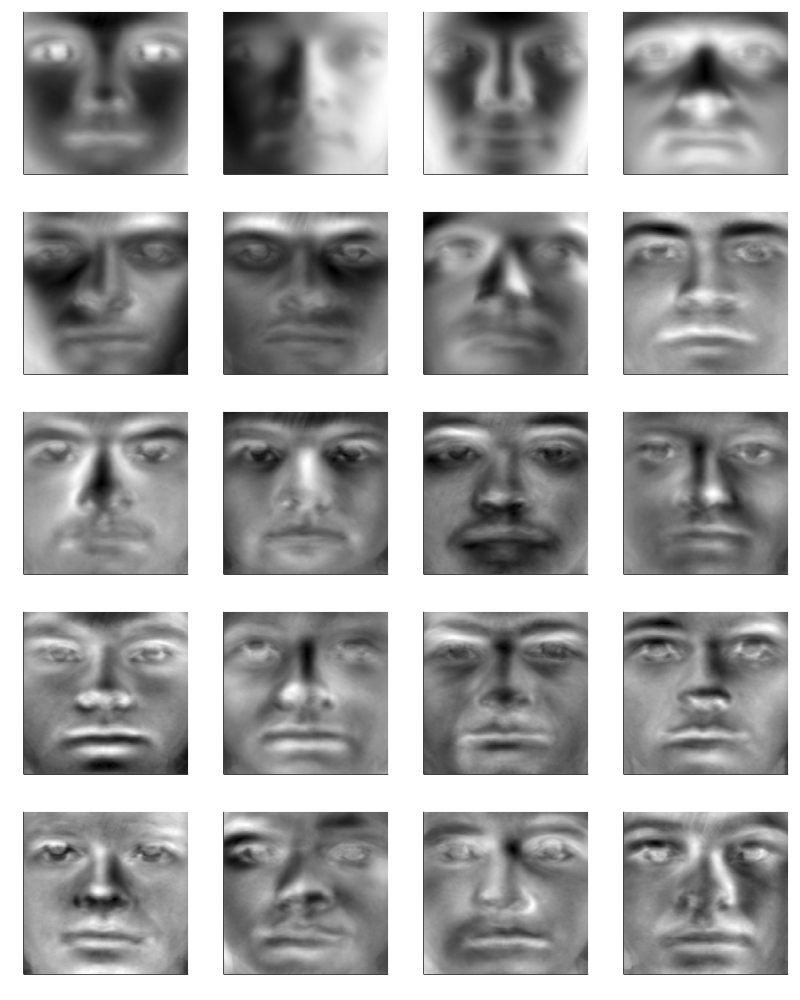

In [129]:
# Visualizing top r faces
r = 20

P = [] # List of plots
for i in 1:r
    Face = vec_to_face(U[:,i], m, n)
    push!(P, heatmap(Face, color = :greys, yflip=true, axis = nothing, legend=false))
end
plot(P[:]..., layout = (5,4), size = (800, 1000))

In [130]:
# Plot singular value fall off

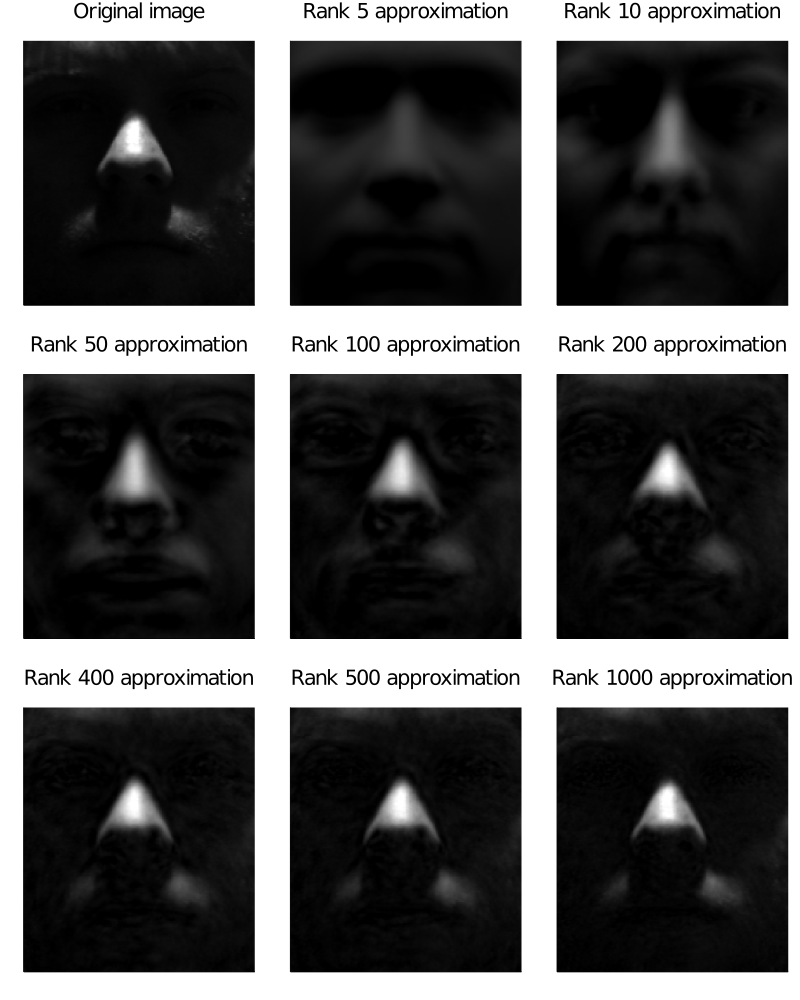

In [135]:
r = [5, 10, 50, 100, 200, 400, 500, 1000] # Rank
test_face = 4 # Test Image

real_face = vec_to_face(X[:, test_face], m, n)
real_plot = heatmap(real_face, color = :greys, yflip=true, axis = nothing, legend=false, title="Original image")

rankr_approx = []
for rank in r
    proj = project_face(F, X[:, test_face], rank)
    proj_face = vec_to_face(proj, m, n)
    push!(rankr_approx, heatmap(proj_face, color = :greys, yflip=true, axis = nothing, legend=false, title="Rank $(rank) approximation"))
end

plot(real_plot, rankr_approx..., layout = 1 + length(r), size = (800, 1000))

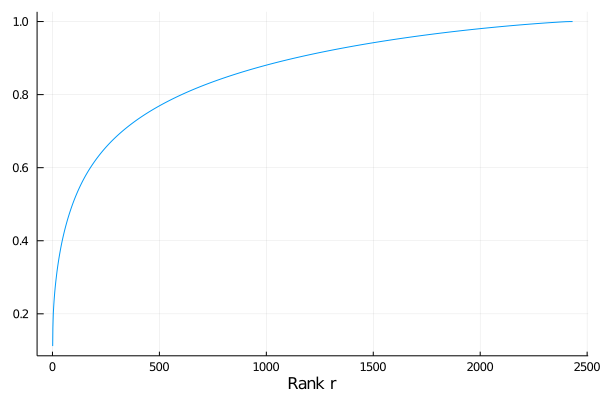

In [132]:
# Percent of spectrum described by modes
plot(cumsum(S)/sum(S), xlabel = "Rank r", legend=false)